<a href="https://colab.research.google.com/github/A-Surkov-2004/A-Surkov-2004.github.io/blob/main/ML_%D0%9F%D1%80%D0%B0%D0%BA%D1%822_(%D0%A1%D1%83%D1%80%D0%BA%D0%BE%D0%B2)%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import statsmodels.api as sm

from datetime import datetime

!wget https://github.com/A-Surkov-2004/jupiterdata/raw/refs/heads/main/dlia%20studentov.xlsx

data = pd.read_excel('dlia studentov.xlsx')

# Общая информация о таблице
print("Размер данных:", data.shape)
print("\nТипы данных и наличие non-null:")
data.info()
# Просмотр первых 5 строк
data.head(5)


--2025-05-31 22:29:04--  https://github.com/A-Surkov-2004/jupiterdata/raw/refs/heads/main/dlia%20studentov.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/A-Surkov-2004/jupiterdata/refs/heads/main/dlia%20studentov.xlsx [following]
--2025-05-31 22:29:05--  https://raw.githubusercontent.com/A-Surkov-2004/jupiterdata/refs/heads/main/dlia%20studentov.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73185 (71K) [application/octet-stream]
Saving to: ‘dlia studentov.xlsx.5’

dlia studentov.xlsx 100%[===================>]  71.47K  --.-KB/s    in 0.03s   

2025-05-31 22:29:05 (2.35 MB/s) - ‘dlia

,ID,Время создания,На каком факультете/в каком институте Вы обучаетесь?,"Какая платформа для обучения дисциплине ""ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ"" использовалась?","Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)","Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?","Был ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов)","Необходим ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов) в электронном курсе?","Материалы, представленные для практического задания, были в разных форматах (например, одновременно и текстовый, и видео)?","Необходимо ли представлять материалы для практического задания в разных форматах (например, одновременно и текстовый, и видео)?",...,Необходим ли встроенный электронный журнал прогресса выполненных работ студентом?,Были ли встроенны в электронный курс видеолекции?,Необходимо ли встраивать в электронный курс видеолекции?,Были ли встроенные в электронный курс тесты по материалом видео лекций?,Была ли предусмотрена рефлексия (отзыв) после выполнения каждого практического задания?,Необходима ли рефлексия (отзыв) после выполнения каждого практического задания?,Была ли предусмотрена рефлексия (отзыв) после завершения работы по дисциплине?,Необходима ли рефлексия (отзыв) после завершения работы по дисциплине?,Было ли организовано взаимодействие с преподавателями посредством мессенджеров?,Необходимо ли организовывать взаимодействие с преподавателями посредством мессенджеров?
0,1408291245,2023-06-07 20:41:17,институт истории и социальных наук,Moodle,нет,нет,нет,нет,да,нет,...,да,да,нет,да,нет,да,нет,да,да,да
1,1405883214,2023-06-05 09:02:21,институт педагогики,Moodle,да,да,нет,да,нет,да,...,да,да,да,да,да,да,да,да,да,да
2,1405869646,2023-06-05 08:44:38,институт педагогики,Moodle,да,да,да,да,да,да,...,да,да,да,да,да,да,да,да,да,да
3,1405856131,2023-06-05 08:26:39,институт педагогики,Moodle,да,да,нет,нет,да,да,...,да,да,да,да,да,да,да,да,да,да
4,1405854542,2023-06-05 08:24:47,институт педагогики,Moodle,да,да,нет,нет,да,да,...,да,да,да,да,нет,нет,да,нет,нет,да


In [ ]:
data = data.drop('ID', axis=1)
data = data.drop('Время создания', axis=1)
data = data.drop('На каком факультете/в каком институте Вы обучаетесь?', axis=1)


1: Какая платформа для обучения дисциплине "ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ" использовалась?
2: Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)
3: Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?
4: Был ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов)
5: Необходим ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов) в электронном курсе?
6: Материалы, представленные для практического задания, были в разных форматах (например, одновременно и текстовый, и видео)?
7: Необходимо ли представлять материалы для практического задания в разных форматах (например, одновременно и текстовый, и видео)?
8: Были ли для каждого Практического задания разработаны и опубликованы критерии оценивания?
9: Необходимы ли для каждого Практического задания критери

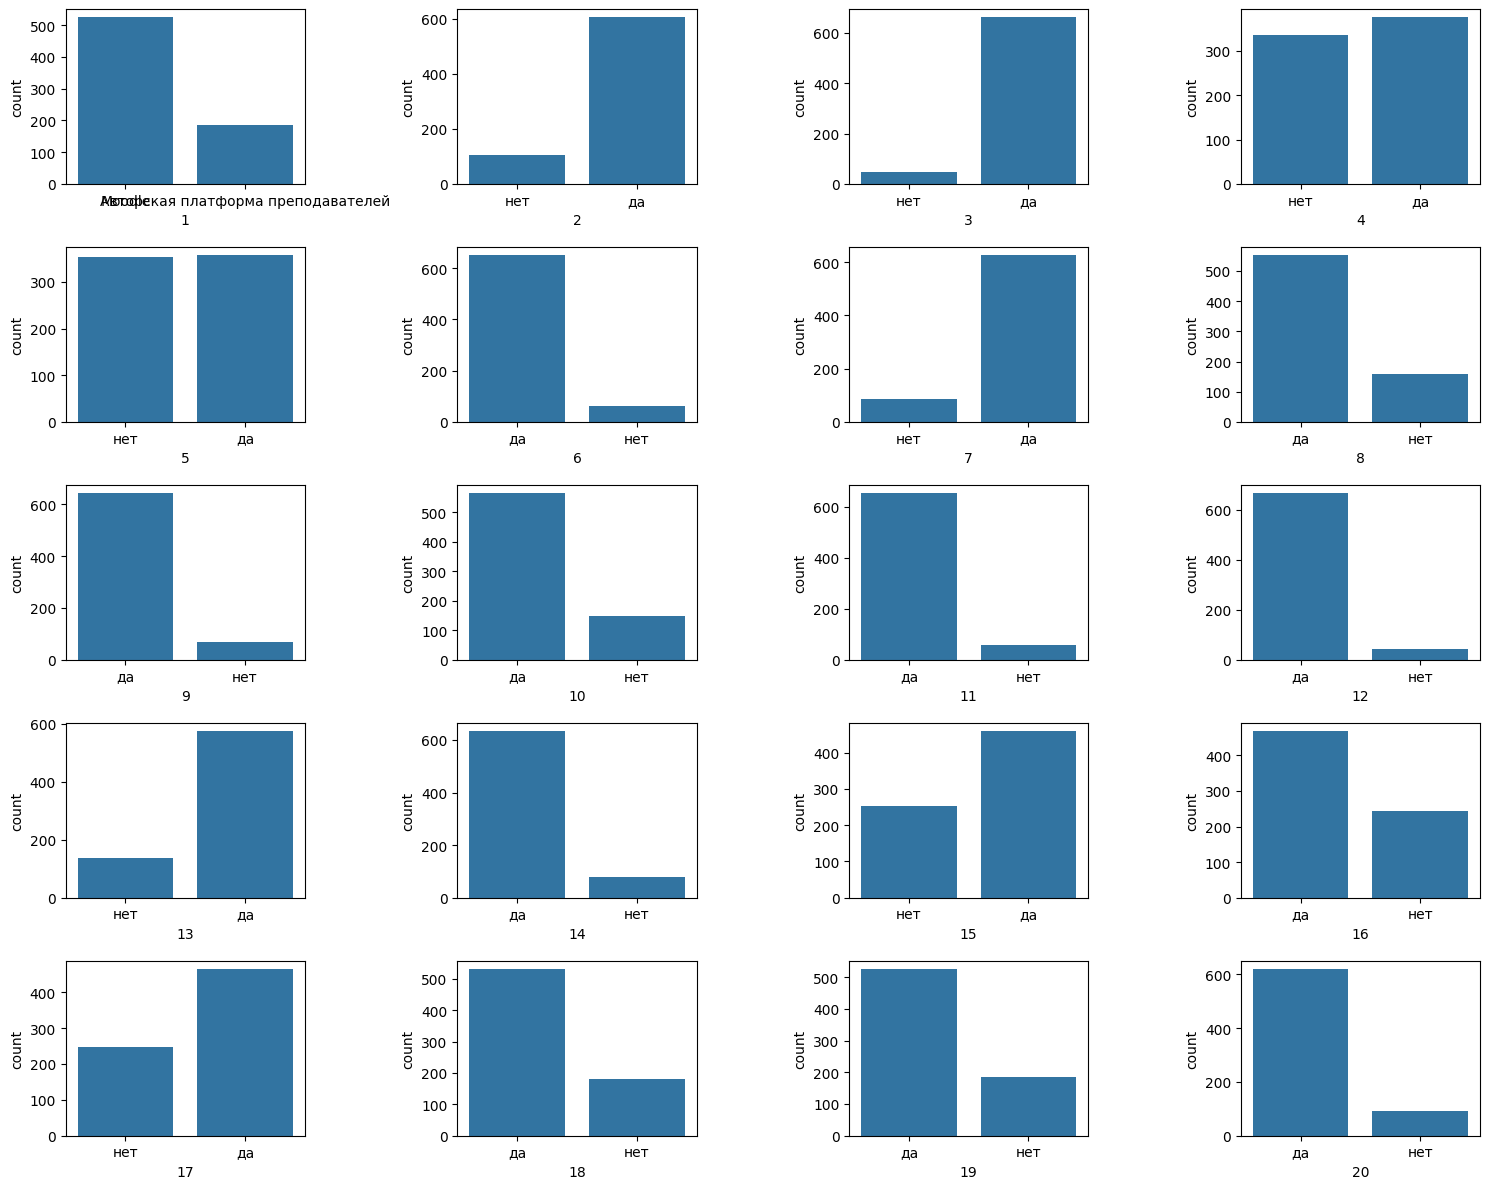

In [ ]:
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

j = 0
plt.figure(figsize=(15, 12))
for target in list(data.columns):
  j +=1
  # Построение графика распределения качества
  plt.subplot(5, 4, j)
  sns.countplot(x=target, data=data)
  plt.xlabel(j)
  print(f'{j}: {target}')


plt.tight_layout()
plt.show()



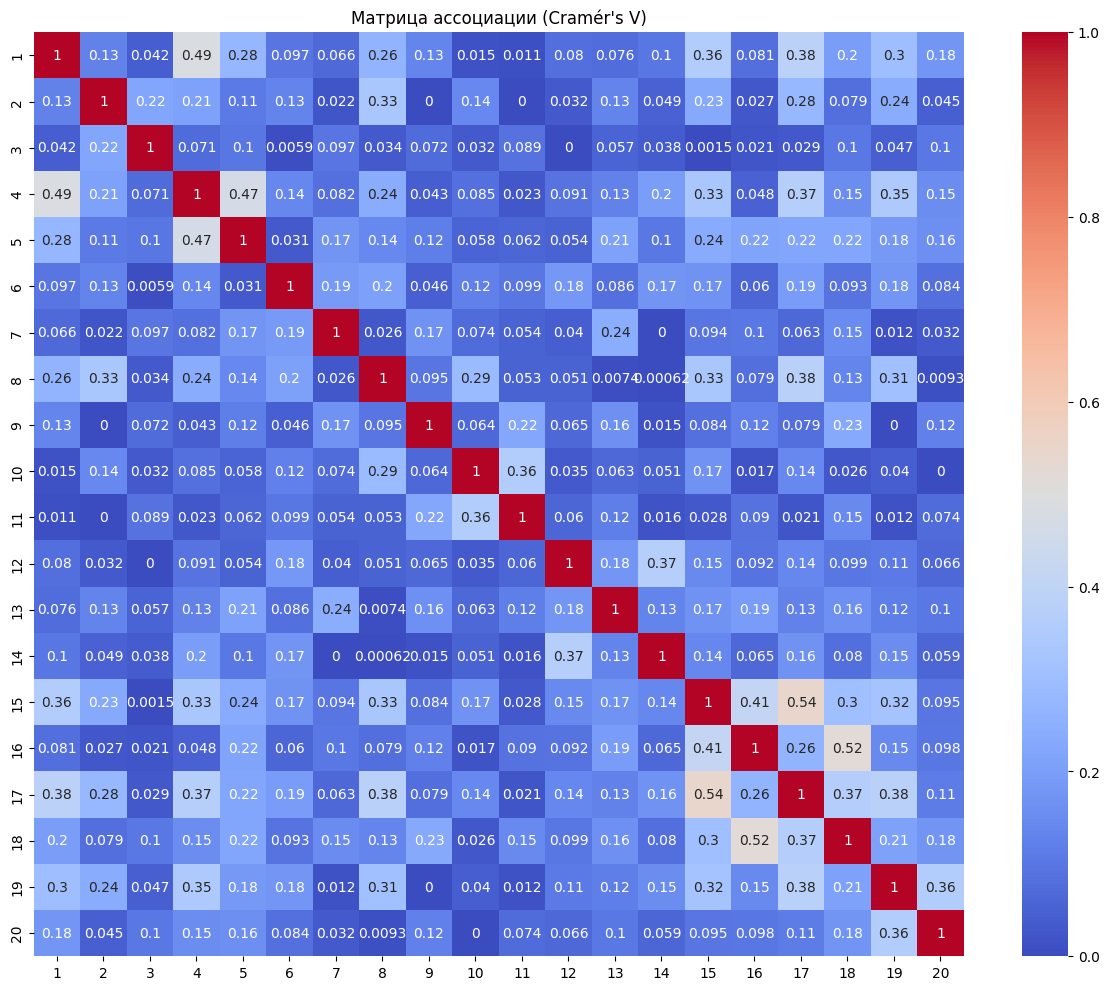

1: Какая платформа для обучения дисциплине "ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ" использовалась?
2: Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)
3: Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?
4: Был ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов)
5: Необходим ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов) в электронном курсе?
6: Материалы, представленные для практического задания, были в разных форматах (например, одновременно и текстовый, и видео)?
7: Необходимо ли представлять материалы для практического задания в разных форматах (например, одновременно и текстовый, и видео)?
8: Были ли для каждого Практического задания разработаны и опубликованы критерии оценивания?
9: Необходимы ли для каждого Практического задания критери

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Пример данных (категориальные переменные)


# Функция для вычисления коэффициента Крамера
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return (phi2 / min((k-1), (r-1))) ** 0.5

# Создаём матрицу коэффициентов
cols = data.columns
corr_matrix = pd.DataFrame(index=cols, columns=cols)

for x in cols:
    for y in cols:
        if x == y:
            corr_matrix.loc[x, y] = 1.0  # Диагональ
        else:
            corr_matrix.loc[x, y] = cramers_v(data[x], data[y])

corr_matrix = corr_matrix.astype(float)

# Визуализация тепловой карты
plt.figure(figsize=(15, 12))
n = len(cols)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, xticklabels=np.arange(1, n + 1), yticklabels=np.arange(1, n + 1))
plt.title("Матрица ассоциации (Cramér's V)")
plt.show()
for i in range(len(cols)):
  print(f'{i+1}: {cols[i]}')

In [ ]:
data = data.replace({'да': 1, 'нет': 0})
data['Какая платформа для обучения дисциплине "ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ" использовалась?'] = data['Какая платформа для обучения дисциплине "ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ" использовалась?'].apply(lambda x: 1 if x == 'Moodle' else 0)
data.head(5)

<ipython-input-105-55e5affdc586>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'да': 1, 'нет': 0})


,"Какая платформа для обучения дисциплине ""ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ"" использовалась?","Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)","Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?","Был ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов)","Необходим ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов) в электронном курсе?","Материалы, представленные для практического задания, были в разных форматах (например, одновременно и текстовый, и видео)?","Необходимо ли представлять материалы для практического задания в разных форматах (например, одновременно и текстовый, и видео)?",Были ли для каждого Практического задания разработаны и опубликованы критерии оценивания?,Необходимы ли для каждого Практического задания критерии оценивания?,Был ли встроенный электронный журнал прогресса выполненных работ студентом?,Необходим ли встроенный электронный журнал прогресса выполненных работ студентом?,Были ли встроенны в электронный курс видеолекции?,Необходимо ли встраивать в электронный курс видеолекции?,Были ли встроенные в электронный курс тесты по материалом видео лекций?,Была ли предусмотрена рефлексия (отзыв) после выполнения каждого практического задания?,Необходима ли рефлексия (отзыв) после выполнения каждого практического задания?,Была ли предусмотрена рефлексия (отзыв) после завершения работы по дисциплине?,Необходима ли рефлексия (отзыв) после завершения работы по дисциплине?,Было ли организовано взаимодействие с преподавателями посредством мессенджеров?,Необходимо ли организовывать взаимодействие с преподавателями посредством мессенджеров?
0,1,0,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,1
1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,0,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-106-1be6a76da135>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', palette='tab10')


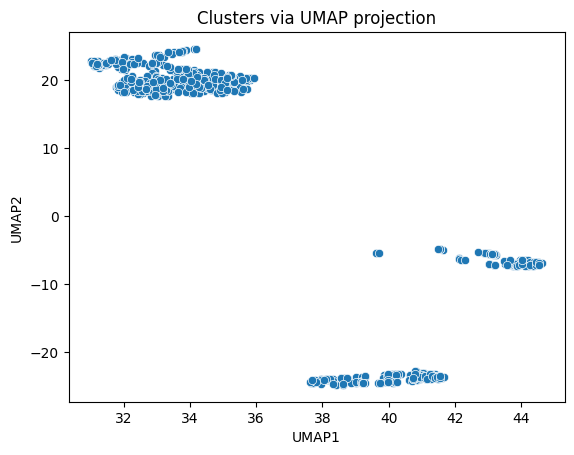

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


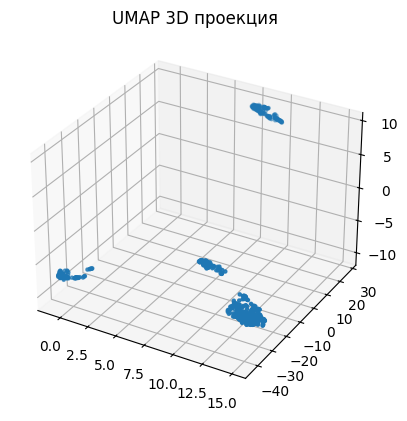

In [ ]:
!pip install umap-learn # установка UMAP, если не установлено
import umap

# Создание и обучение модели UMAP
reducer = umap.UMAP(random_state=42)
embedding_2d = reducer.fit_transform(data)

umap_df = pd.DataFrame(embedding_2d, columns=['UMAP1','UMAP2'])

sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', palette='tab10')
plt.title("Clusters via UMAP projection")
plt.show()



# 3D проекция
umap_3d = umap.UMAP(n_components=3, random_state=42)
embedding_3d = umap_3d.fit_transform(data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding_3d[:,0], embedding_3d[:,1], embedding_3d[:,2], s=5)
plt.title('UMAP 3D проекция')
plt.show()

In [ ]:


# Сохранение 2D и 3D представлений
np.save('umap_2d_embedding.npy', embedding_2d)
np.save('umap_3d_embedding.npy', embedding_3d)

# Сохранение параметров модели
import joblib
joblib.dump(reducer, 'umap_2d_model.pkl')
joblib.dump(umap_3d, 'umap_3d_model.pkl')

['umap_3d_model.pkl']

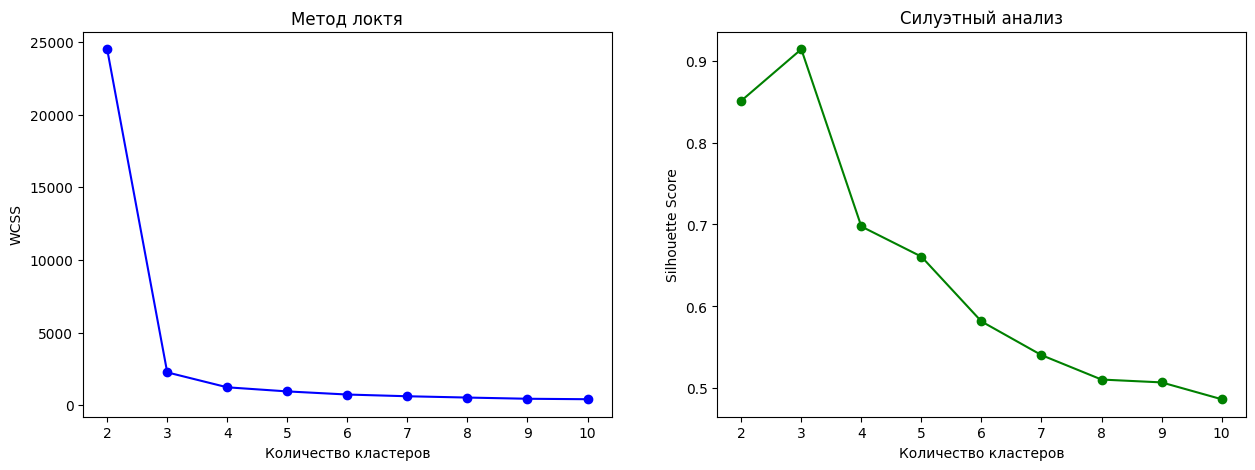

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

umap_2d = np.load('umap_2d_embedding.npy')
umap_3d = np.load('umap_3d_embedding.npy')

def find_optimal_clusters(data, max_k=10):
    wcss = []  # Within-cluster sum of squares
    sil_scores = []

    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

        if len(np.unique(kmeans.labels_)) > 1:  # Для силуэта нужно >1 кластер
            sil_scores.append(silhouette_score(data, kmeans.labels_))
        else:
            sil_scores.append(0)

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(range(2, max_k+1), wcss, 'bo-')
    ax1.set_title('Метод локтя')
    ax1.set_xlabel('Количество кластеров')
    ax1.set_ylabel('WCSS')

    ax2.plot(range(2, max_k+1), sil_scores, 'go-')
    ax2.set_title('Силуэтный анализ')
    ax2.set_xlabel('Количество кластеров')
    ax2.set_ylabel('Silhouette Score')

    plt.show()

# Анализ для 2D представления
find_optimal_clusters(umap_2d)



In [ ]:
optimal_k = 3

# Для 2D представления
kmeans_2d = KMeans(n_clusters=optimal_k, random_state=42)
clusters_2d = kmeans_2d.fit_predict(umap_2d)

# Для 3D представления
kmeans_3d = KMeans(n_clusters=optimal_k, random_state=42)
clusters_3d = kmeans_3d.fit_predict(umap_3d)

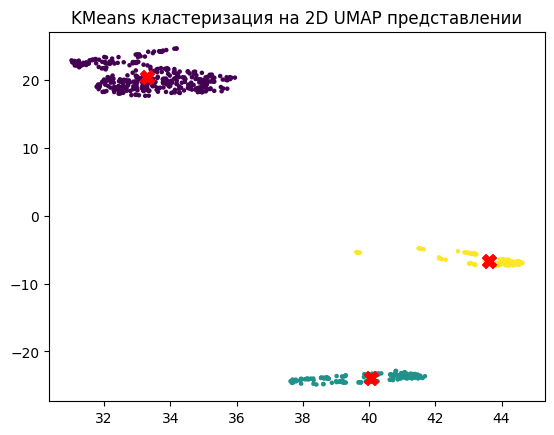

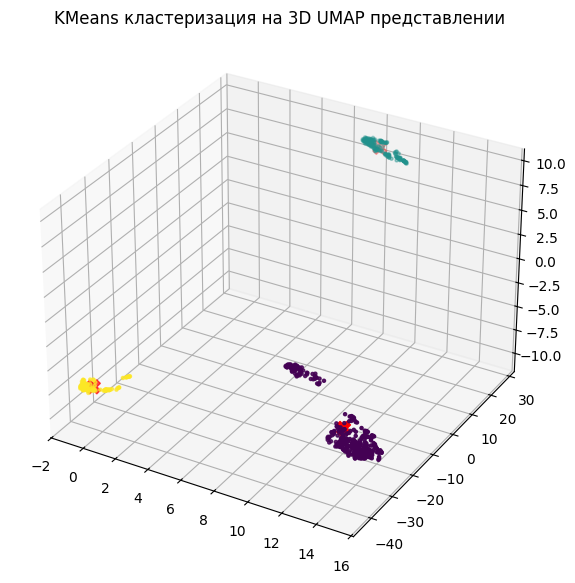

In [ ]:
# Для 2D
plt.scatter(umap_2d[:, 0], umap_2d[:, 1], c=clusters_2d, cmap='viridis', s=5)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1],
            c='red', marker='X', s=100)
plt.title('KMeans кластеризация на 2D UMAP представлении')
plt.show()

# Для 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_3d[:, 0], umap_3d[:, 1], umap_3d[:, 2],
           c=clusters_3d, cmap='viridis', s=5)
ax.scatter(kmeans_3d.cluster_centers_[:, 0],
           kmeans_3d.cluster_centers_[:, 1],
           kmeans_3d.cluster_centers_[:, 2],
           c='red', marker='X', s=100)
plt.title('KMeans кластеризация на 3D UMAP представлении')
plt.show()

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering(data, labels):
    print(f"Silhouette Score: {silhouette_score(data, labels):.3f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_score(data, labels):.3f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(data, labels):.3f}")

print("Оценка для 2D представления:")
evaluate_clustering(umap_2d, clusters_2d)

print("\nОценка для 3D представления:")
evaluate_clustering(umap_3d, clusters_3d)

Оценка для 2D представления:
Silhouette Score: 0.914
Calinski-Harabasz Index: 43678.332
Davies-Bouldin Index: 0.116

Оценка для 3D представления:
Silhouette Score: 0.887
Calinski-Harabasz Index: 37284.621
Davies-Bouldin Index: 0.136


In [ ]:
# Добавляем метки кластеров к исходным данным
data_with_clusters = data.copy()
data_with_clusters['cluster_2d'] = clusters_2d
data_with_clusters['cluster_3d'] = clusters_3d

In [ ]:
from sklearn.feature_selection import f_oneway

# Список для хранения результатов
anova_results = []

for feature in data:
    clusters = [data_with_clusters[data_with_clusters['cluster_2d']==k][feature] for k in data_with_clusters['cluster_2d'].unique()]
    f_val, p_val = f_oneway(*clusters)
    anova_results.append({'feature': feature, 'F-value': f_val, 'p-value': p_val})

# Создаем DataFrame и сортируем по F-value (чем выше, тем значимее)
anova_df = pd.DataFrame(anova_results).sort_values('F-value', ascending=False)
print(anova_df.head(10))

                                              feature               F-value  \
0   Какая платформа для обучения дисциплине "ИНФОК...  [1616.2001233471274]   
3   Был ли автоматический мониторинг присутствия с...   [325.6847171957675]   
14  Была ли предусмотрена рефлексия (отзыв) после ...   [184.3527140242703]   
16  Была ли предусмотрена рефлексия (отзыв) после ...   [170.6503160457153]   
4   Необходим ли автоматический мониторинг присутс...  [168.15740490774527]   
18  Было ли организовано взаимодействие с преподав...   [92.28292182127171]   
7   Были ли для каждого Практического задания разр...   [73.54138110221565]   
15  Необходима ли рефлексия (отзыв) после выполнен...  [40.445142460163616]   
17  Необходима ли рефлексия (отзыв) после завершен...  [32.490146907602366]   
1   Был ли предусмотрен фидбек (отклик преподавате...  [25.587972309846286]   

                      p-value  
0   [1.2316681645577815e-264]  
3    [5.132134579870346e-101]  
14   [3.5438043847445466e-65]  
16

In [ ]:
# Процентили для каждого признака в кластерах
cluster_profiles = data_with_clusters.groupby('cluster_2d').agg(
    ['mean']
)

# Выводим только топ-признаки
top_features = anova_df['feature'].head(7)

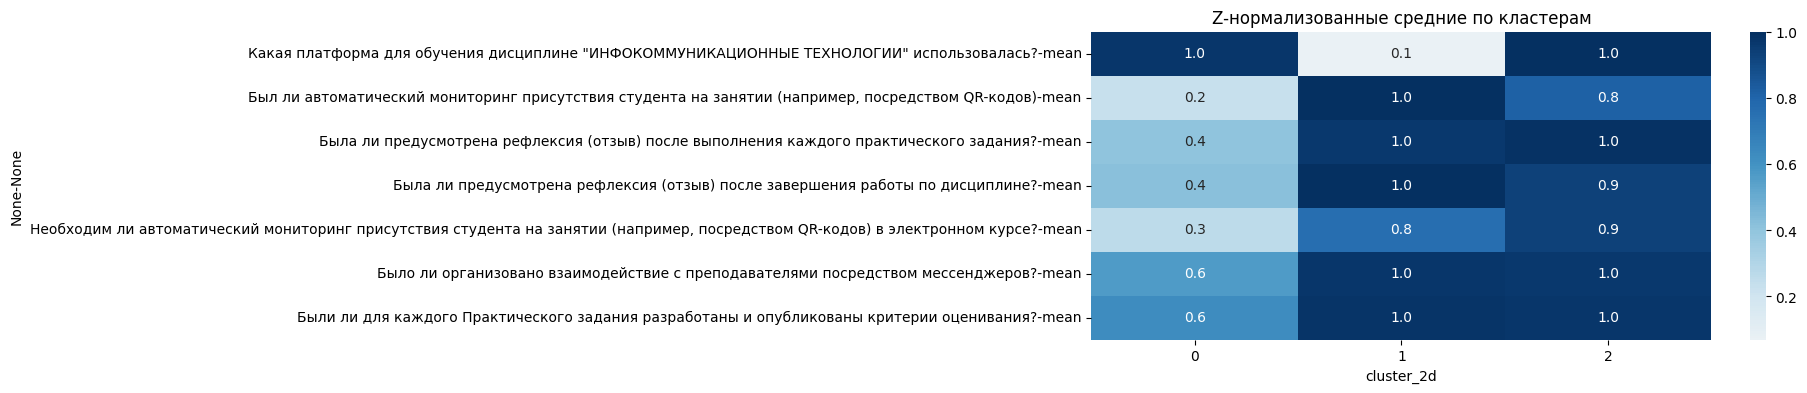

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Z-нормализация
normalized = cluster_profiles[top_features]

# Тепловая карта
plt.figure(figsize=(10, 4))
sns.heatmap(normalized.T, cmap="RdBu", center=0, annot=True, fmt=".1f")
plt.title("Z-нормализованные средние по кластерам")
plt.show()

,count
cluster_2d,
0,408
1,186
2,117


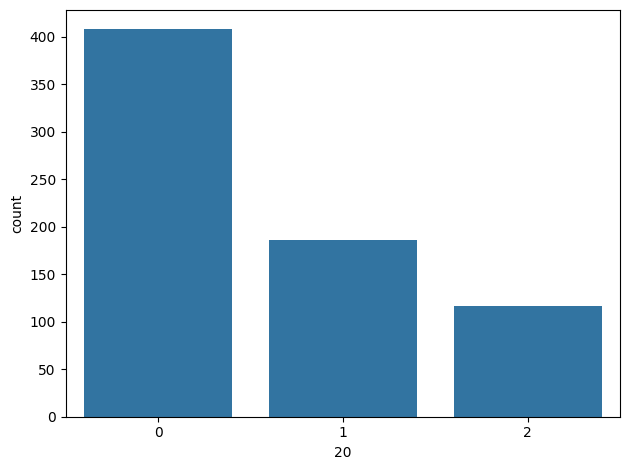

In [ ]:
cluster_counts = data_with_clusters['cluster_2d'].value_counts().sort_index()
display(cluster_counts)



plt.figure()

plt.plot(5, 4)
sns.countplot(x='cluster_2d', data=data_with_clusters)
plt.xlabel(j)



plt.tight_layout()
plt.show()

# Результаты анализа:

Мы можем выделить 3 группы студентов

1. Используют Мудл, но не используют другие информационные технологии в обучении (408 студентов)
1. Не используют Мудл, но при этом часто используют информационные технологии в обучении (используют другую площадку, аналогичную Мудл) (186 студентов)
1. Используют Мудл а также другие информационные технологии в обучении (117 студентов)


### Примечание:
При использовании 3д UMAP потенциально можно выделить и проанализировать 4-й кластер, но сделать я это не успею